In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Pretendard"
plt.rcParams["font.size"] = 10
import seaborn as sns
from plotnine import *
import missingno as msno
import folium

전국 도시 공원 표준 데이터

In [2]:
park_202212 = pd.read_csv('./data/park_202212.csv', encoding='euc-kr')
park_202212

관리번호              공원명   공원구분 소재지도로명주소                  소재지지번주소  \
0      47190-00127           백현체육공원   체육공원      NaN      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원      NaN       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      NaN      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원      NaN       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원      NaN         경상북도 구미시 봉곡동 767   
...            ...              ...    ...      ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원      NaN  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원      NaN   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN     경기도 용인시 수지구 풍덕천동 696   

              위도          경도     공원면적 공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설)  \
0      36.186429  128.478491  90967.0          NaN          NaN          NaN   
1      36.148431  128.316594   4279.0          NaN          NaN          NaN   
2      36.155883  128.311526    805.0          NaN          NaN          NaN   
3      36.156392  128.314372   1585.0          NaN          NaN          NaN   
4      36.154808  128.314372   1637.0          NaN          NaN          NaN   
...          ...         ...      ...          ...          ...          ...   
17460  37.238001  127.164249   4878.0          NaN          NaN          NaN   
17461  37.238235  127.169302  17748.0          NaN          NaN          NaN   
17462  37.333938  127.253862   5817.0          NaN          NaN          NaN   
17463  37.272922  127.221799   2558.0          NaN          NaN          NaN   
17464  37.323979  127.091005  15741.0          NaN          NaN          NaN   

      공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일 관리기관명 전화번호     데이터기준일자   제공기관코드  \
0              NaN          NaN         NaN   NaN  NaN  2022-06-09  5080000   
1              NaN          NaN         NaN   NaN  NaN  2022-06-09  5080000   
2              NaN          NaN         NaN   NaN  NaN  2022-06-09  5080000   
3              NaN          NaN         NaN   NaN  NaN  2022-06-09  5080000   
4              NaN          NaN         NaN   NaN  NaN  2022-06-09  5080000   
...            ...          ...         ...   ...  ...         ...      ...   
17460          NaN          NaN  2008-10-02   NaN  NaN  2022-11-23  4050000   
17461          NaN          NaN  2008-10-02   NaN  NaN  2022-11-23  4050000   
17462          NaN          NaN  2008-10-06   NaN  NaN  2022-11-23  4050000   
17463          NaN          NaN  2008-10-06   NaN  NaN  2022-11-23  4050000   
17464          NaN          NaN  1995-12-30   NaN  NaN  2022-11-23  4050000   

          제공기관명  
0      경상북도 구미시  
1      경상북도 구미시  
2      경상북도 구미시  
3      경상북도 구미시  
4      경상북도 구미시  
...         ...  
17460   경기도 용인시  
17461   경기도 용인시  
17462   경기도 용인시  
17463   경기도 용인시  
17464   경기도 용인시  

[17465 rows x 19 columns]

In [3]:
park_202212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          17465 non-null  object 
 1   공원명           17465 non-null  object 
 2   공원구분          17465 non-null  object 
 3   소재지도로명주소      4114 non-null   object 
 4   소재지지번주소       17126 non-null  object 
 5   위도            17425 non-null  float64
 6   경도            17426 non-null  float64
 7   공원면적          17465 non-null  float64
 8   공원보유시설(운동시설)  4849 non-null   object 
 9   공원보유시설(유희시설)  6170 non-null   object 
 10  공원보유시설(편익시설)  4848 non-null   object 
 11  공원보유시설(교양시설)  807 non-null    object 
 12  공원보유시설(기타시설)  2585 non-null   object 
 13  지정고시일         14552 non-null  object 
 14  관리기관명         15956 non-null  object 
 15  전화번호          16194 non-null  object 
 16  데이터기준일자       17465 non-null  object 
 17  제공기관코드        17465 non-null  object 
 18  제공기관명         17465 non-nu

In [4]:
park_202212.isna().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        13351
소재지지번주소           339
위도                 40
경도                 39
공원면적                0
공원보유시설(운동시설)    12616
공원보유시설(유희시설)    11295
공원보유시설(편익시설)    12617
공원보유시설(교양시설)    16658
공원보유시설(기타시설)    14880
지정고시일            2913
관리기관명            1509
전화번호             1271
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

<AxesSubplot:>

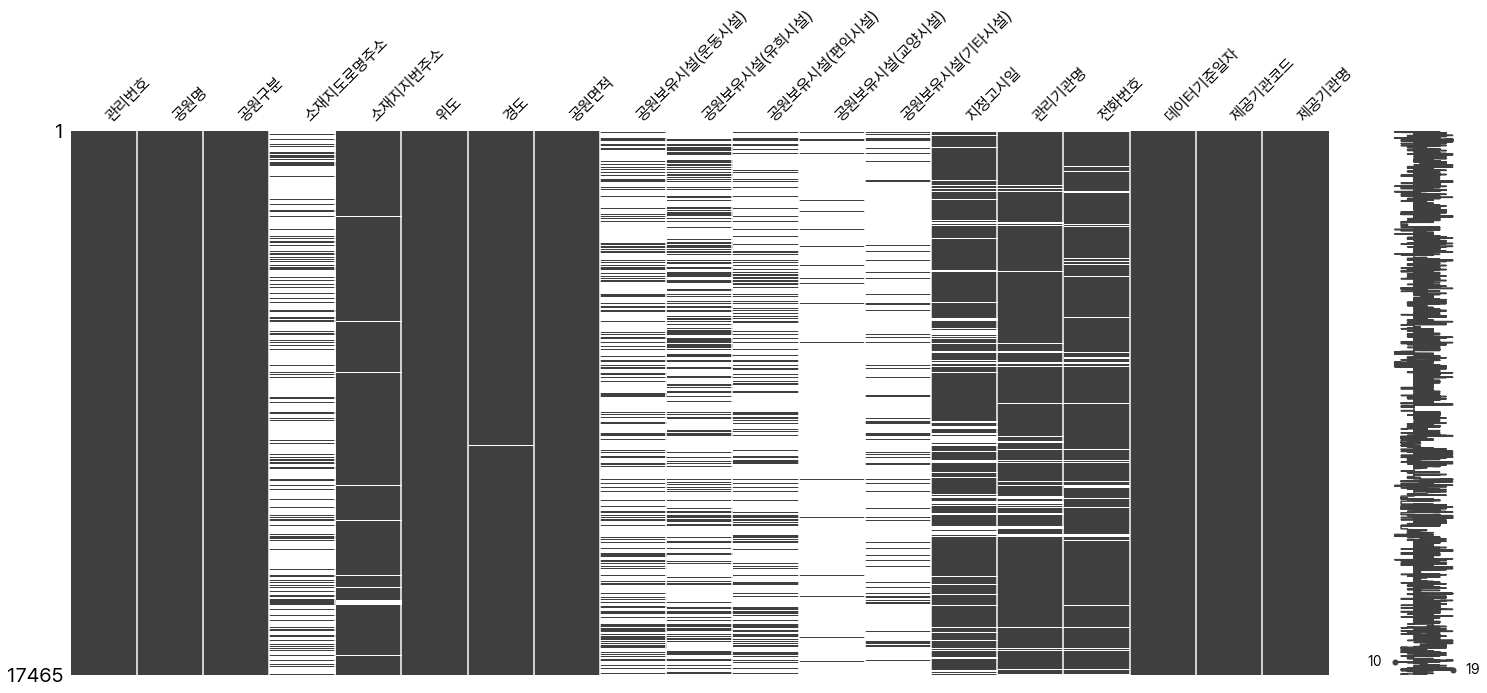

In [5]:
msno.matrix(park_202212)

In [6]:
park_202212.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [7]:
# drop() 함수로 불필요한 컬럼을 제거한다.
# columns 속성에 제거할 열 이름을 지정한다. 단, 제거할 열이 2개 이상이면 []로 묶어서 리스트로 넘겨야 한다.
# inplace=True 속성을 지정하면 실행 결과가 데이터프레임에 바로 저장된다.
park_202212.drop(columns=['공원보유시설(운동시설)','공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)', '공원보유시설(기타시설)', '지정고시일', '관리기관명'], inplace=True)

In [8]:
park_202212

관리번호              공원명   공원구분 소재지도로명주소                  소재지지번주소  \
0      47190-00127           백현체육공원   체육공원      NaN      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원      NaN       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      NaN      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원      NaN       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원      NaN         경상북도 구미시 봉곡동 767   
...            ...              ...    ...      ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원      NaN  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원      NaN   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN     경기도 용인시 수지구 풍덕천동 696   

              위도          경도     공원면적 전화번호     데이터기준일자   제공기관코드     제공기관명  
0      36.186429  128.478491  90967.0  NaN  2022-06-09  5080000  경상북도 구미시  
1      36.148431  128.316594   4279.0  NaN  2022-06-09  5080000  경상북도 구미시  
2      36.155883  128.311526    805.0  NaN  2022-06-09  5080000  경상북도 구미시  
3      36.156392  128.314372   1585.0  NaN  2022-06-09  5080000  경상북도 구미시  
4      36.154808  128.314372   1637.0  NaN  2022-06-09  5080000  경상북도 구미시  
...          ...         ...      ...  ...         ...      ...       ...  
17460  37.238001  127.164249   4878.0  NaN  2022-11-23  4050000   경기도 용인시  
17461  37.238235  127.169302  17748.0  NaN  2022-11-23  4050000   경기도 용인시  
17462  37.333938  127.253862   5817.0  NaN  2022-11-23  4050000   경기도 용인시  
17463  37.272922  127.221799   2558.0  NaN  2022-11-23  4050000   경기도 용인시  
17464  37.323979  127.091005  15741.0  NaN  2022-11-23  4050000   경기도 용인시  

[17465 rows x 12 columns]

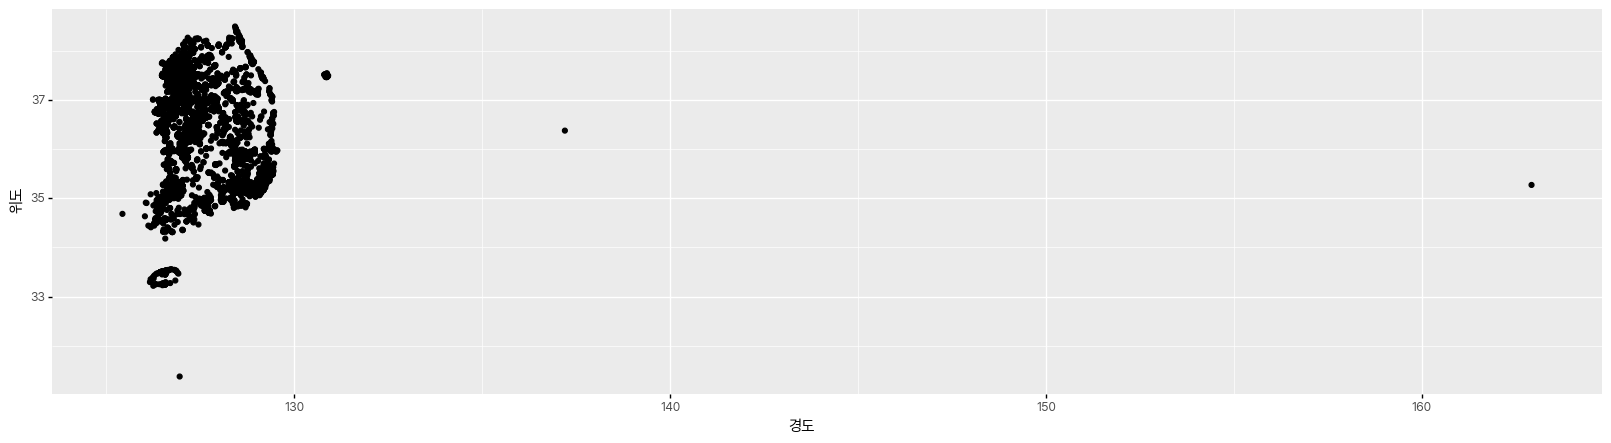

<ggplot: (91135085779)>

In [9]:
(
    ggplot(park_202212, aes(x='경도', y='위도'))
        + geom_point()
        + theme(text=element_text(family='Pretendard'), figure_size=(20, 5))
)

<AxesSubplot:xlabel='경도', ylabel='위도'>

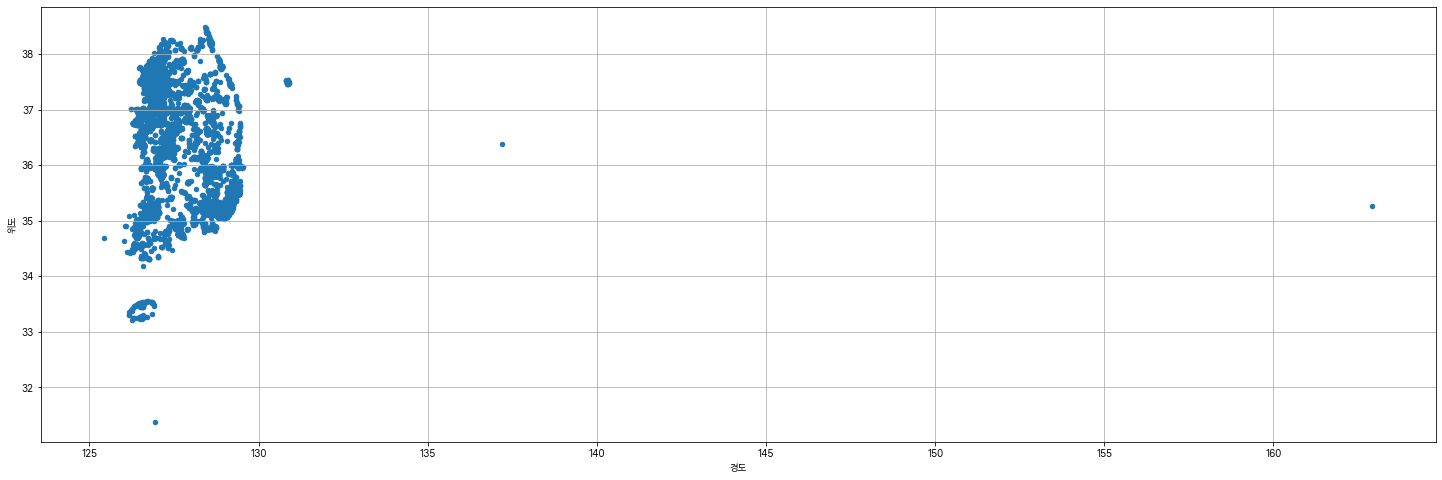

In [10]:
park_202212.plot.scatter(x='경도', y='위도', grid=True, figsize=(25, 8))

데이터 전처리

In [11]:
park_202212.공원면적.head()

0    90967.0
1     4279.0
2      805.0
3     1585.0
4     1637.0
Name: 공원면적, dtype: float64

In [12]:
# CircleMarker를 표시하기 위해 '공원면적' 열을 적당한 수식을 실행해서 '공원면적비율' 열을 만든다.
# 시리즈.apply(lambda 변수 : 수식)
# 시리즈에 저장된 데이터가 lambda 뒤의 변수로 한 건씩 전달되고, ':' 다음의 수식을 실행한 후 apply() 함수에 의해 일괄 적용된다.
park_202212['공원면적비율'] = park_202212['공원면적'].apply(lambda x: np.sqrt(x) * 0.01)
park_202212

관리번호              공원명   공원구분 소재지도로명주소                  소재지지번주소  \
0      47190-00127           백현체육공원   체육공원      NaN      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원      NaN       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      NaN      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원      NaN       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원      NaN         경상북도 구미시 봉곡동 767   
...            ...              ...    ...      ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원      NaN  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원      NaN   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN     경기도 용인시 수지구 풍덕천동 696   

              위도          경도     공원면적 전화번호     데이터기준일자   제공기관코드     제공기관명  \
0      36.186429  128.478491  90967.0  NaN  2022-06-09  5080000  경상북도 구미시   
1      36.148431  128.316594   4279.0  NaN  2022-06-09  5080000  경상북도 구미시   
2      36.155883  128.311526    805.0  NaN  2022-06-09  5080000  경상북도 구미시   
3      36.156392  128.314372   1585.0  NaN  2022-06-09  5080000  경상북도 구미시   
4      36.154808  128.314372   1637.0  NaN  2022-06-09  5080000  경상북도 구미시   
...          ...         ...      ...  ...         ...      ...       ...   
17460  37.238001  127.164249   4878.0  NaN  2022-11-23  4050000   경기도 용인시   
17461  37.238235  127.169302  17748.0  NaN  2022-11-23  4050000   경기도 용인시   
17462  37.333938  127.253862   5817.0  NaN  2022-11-23  4050000   경기도 용인시   
17463  37.272922  127.221799   2558.0  NaN  2022-11-23  4050000   경기도 용인시   
17464  37.323979  127.091005  15741.0  NaN  2022-11-23  4050000   경기도 용인시   

         공원면적비율  
0      3.016074  
1      0.654141  
2      0.283725  
3      0.398121  
4      0.404599  
...         ...  
17460  0.698427  
17461  1.332216  
17462  0.762693  
17463  0.505767  
17464  1.254631  

[17465 rows x 13 columns]

In [13]:
# 도로명 주소가 NaN인 데이터 개수 => 지번 주소만 입력된 데이터의 개수
# 도로명 주소만 입력되고 지번 주소가 입력되지 않은 데이터는 도로명 주소 제도가 실행되고난 후 조성된 공원이다.
park_202212['소재지도로명주소'].isna().sum(), park_202212['소재지도로명주소'].notnull().sum()

(13351, 4114)

In [14]:
# 도로명 주소는 입력되지 않고 지번 주소만 입력된 데이터
# 불린 인덱싱 작업시 and 조건이나 or이 사용되면 and(&) 또는 or(|) 연산에 참여하는 데이터에 관계 연산자가 사용되면 ()로 묶어준다.
# and 또는 or 연산에 참여하는 데이터 자체가 논리값인 경우 ()로 묶지 않아도 상관없다.
park_202212[(park_202212['소재지도로명주소'].isna()) &  park_202212['소재지지번주소'].notnull()]

관리번호              공원명   공원구분 소재지도로명주소                  소재지지번주소  \
0      47190-00127           백현체육공원   체육공원      NaN      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원      NaN       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      NaN      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원      NaN       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원      NaN         경상북도 구미시 봉곡동 767   
...            ...              ...    ...      ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원      NaN  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원      NaN   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN     경기도 용인시 수지구 풍덕천동 696   

              위도          경도     공원면적 전화번호     데이터기준일자   제공기관코드     제공기관명  \
0      36.186429  128.478491  90967.0  NaN  2022-06-09  5080000  경상북도 구미시   
1      36.148431  128.316594   4279.0  NaN  2022-06-09  5080000  경상북도 구미시   
2      36.155883  128.311526    805.0  NaN  2022-06-09  5080000  경상북도 구미시   
3      36.156392  128.314372   1585.0  NaN  2022-06-09  5080000  경상북도 구미시   
4      36.154808  128.314372   1637.0  NaN  2022-06-09  5080000  경상북도 구미시   
...          ...         ...      ...  ...         ...      ...       ...   
17460  37.238001  127.164249   4878.0  NaN  2022-11-23  4050000   경기도 용인시   
17461  37.238235  127.169302  17748.0  NaN  2022-11-23  4050000   경기도 용인시   
17462  37.333938  127.253862   5817.0  NaN  2022-11-23  4050000   경기도 용인시   
17463  37.272922  127.221799   2558.0  NaN  2022-11-23  4050000   경기도 용인시   
17464  37.323979  127.091005  15741.0  NaN  2022-11-23  4050000   경기도 용인시   

         공원면적비율  
0      3.016074  
1      0.654141  
2      0.283725  
3      0.398121  
4      0.404599  
...         ...  
17460  0.698427  
17461  1.332216  
17462  0.762693  
17463  0.505767  
17464  1.254631  

[13351 rows x 13 columns]

In [15]:
# 지번 주소가 NaN인 데이터의 개수 => 도로명 주소만 입력된 데이터의 개수
park_202212['소재지지번주소'].isna().sum()

339

In [16]:
# 도로명 주소는 입력되고 지번 주소가 입력되지 않은 데이터
park_202212[park_202212['소재지도로명주소'].notnull() & park_202212['소재지지번주소'].isnull()]

관리번호          공원명   공원구분                               소재지도로명주소  \
145    41360-00078   별내택지어린이공원3  어린이공원                  경기도 남양주시 별내동 별내3로 285   
599    45800-00001         서림공원   근린공원  전라북도 부안군 부안읍 동중리, 서외리, 행안면 역리 190전 일원   
1561   46150-00018         내동공원  어린이공원                 전라남도 순천시 승주읍 서평내동1길 26   
1562   46150-00019         승평공원  어린이공원                   전라남도 순천시 승주읍 승평동길 46   
1563   46150-00020         동내공원   근린공원                    전라남도 순천시 낙안면 삼일로 71   
...            ...          ...    ...                                    ...   
15914  28260-00006  여우재공원(이름변경)  어린이공원                        인천광역시 서구 고래울로 6   
15915  28260-00007        가좌울공원  어린이공원                       인천광역시 서구 고래울로 35   
15917  28260-00009         가좌공원  어린이공원                       인천광역시 서구 고래울로 12   
15920  28260-00012         가정공원  어린이공원                  인천광역시 서구 가정로 406번길 10   
16838  31170-00001        대왕암공원   근린공원                        울산광역시 동구 등대로 95   

      소재지지번주소         위도          경도      공원면적          전화번호     데이터기준일자  \
145       NaN  37.662716  127.116471    2743.0  031-590-8601  2022-12-07   
599       NaN  35.732919  126.731487  408986.0  063-580-4644  2022-05-26   
1561      NaN  35.015910  127.388269    3515.0  061-749-6330  2021-09-01   
1562      NaN  35.018377  127.376535    2600.0  061-749-6330  2021-09-01   
1563      NaN  34.904578  127.343855    6700.0  061-749-8831  2021-09-01   
...       ...        ...         ...       ...           ...         ...   
15914     NaN  37.488595  126.683657    1501.0  032-560-4800  2022-08-02   
15915     NaN  37.486735  126.685936    1920.0  032-560-4800  2022-08-02   
15917     NaN  37.487925  126.684202    7280.0  032-560-4800  2022-08-02   
15920     NaN  37.520940  126.674269    6612.0  032-560-4800  2022-08-02   
16838     NaN  35.490418  129.435245  942000.0  052-209-3753  2022-04-12   

        제공기관코드     제공기관명    공원면적비율  
145    3990000  경기도 남양주시  0.523737  
599    4790000  전라북도 부안군  6.395201  
1561   4820000  전라남도 순천시  0.592874  
1562   4820000  전라남도 순천시  0.509902  
1563   4820000  전라남도 순천시  0.818535  
...        ...       ...       ...  
15914  3560000  인천광역시 서구  0.387427  
15915  3560000  인천광역시 서구  0.438178  
15917  3560000  인천광역시 서구  0.853229  
15920  3560000  인천광역시 서구  0.813142  
16838  3710000  울산광역시 동구  9.705668  

[339 rows x 13 columns]

In [17]:
# 도로명 주소와 지번 주소가 모두 입력된 데이터
park_202212[park_202212['소재지도로명주소'].notnull() & park_202212['소재지지번주소'].notnull()]

관리번호                공원명   공원구분                    소재지도로명주소  \
6      47190-00133         산림문화생태근린공원   근린공원           경상북도 구미시 인덕1길 240   
81     41370-00109             원동수변공원   수변공원          경기도 오산시 부원로87번길 51   
82     41370-00110            가장동체육공원   체육공원           경기도 오산시 가장산업동로 49   
97     31140-00015              헐수정공원  어린이공원         울산광역시 남구 신복로23번길 16   
107    41430-00111               근린공원   근린공원            경기도 의왕시 초평동 19-1   
...            ...                ...    ...                         ...   
17421  42820-00013           화포3거리 공원    소공원     강원도 고성군 현내면 화진포길 204-25   
17426  42820-00018           초도리 통일공원    소공원        강원도 고성군 현내면 금강산로 186   
17436  41461-00001  제11호 근린공원(용인중앙공원)   근린공원  경기도 용인시 처인구 백옥대로1081번길 5-2   
17437  41461-00002    제32호 근린공원(번암공원)   근린공원     경기도 용인시 처인구 금학로277번길 16   
17448  41461-00013            천주교묘지공원   묘지공원  경기도 용인시 처인구 모현읍 오산로 154-62   

                         소재지지번주소         위도          경도       공원면적  \
6         경상북도 구미시 산동면 인덕리 산 5-1  36.165099  128.460466  1059228.0   
81              경기도 오산시 원동 715-8  37.140907  127.091507    17788.0   
82             경기도 오산시 가장동 382-4  37.164782  127.041189    11856.0   
97              울산광역시 남구 무거동 837  35.547388  129.258582     4078.6   
107             경기도 의왕시 초평동 19-1  37.318538  126.944477    14234.0   
...                          ...        ...         ...        ...   
17421        강원도 고성군 거진읍 화포리 496  38.460685  128.443610      500.0   
17426       강원도 고성군 현내면 초도리 산2-2  38.491555  128.428343     5631.0   
17436    경기도 용인시 처인구 김량장동 산37-16  37.231706  127.208376   579879.0   
17437        경기도 용인시 처인구 역북동 733  37.239140  127.194987    58886.0   
17448  경기도 용인시 처인구 모현읍 오산리 325-4  37.321104  127.146527   847474.0   

                전화번호     데이터기준일자   제공기관코드     제공기관명     공원면적비율  
6                NaN  2022-06-09  5080000  경상북도 구미시  10.291880  
81     031-8036-6473  2022-04-30  4000000   경기도 오산시   1.333717  
82     031-8036-6473  2022-04-30  4000000   경기도 오산시   1.088853  
97      052-226-5903  2022-03-31  3700000  울산광역시 남구   0.638639  
107     031-345-3083  2022-06-13  4030000   경기도 의왕시   1.193063  
...              ...         ...      ...       ...        ...  
17421   033-680-3423  2022-12-01  4340000   강원도 고성군   0.223607  
17426   033-680-3423  2022-12-01  4340000   강원도 고성군   0.750400  
17436            NaN  2022-11-23  4050000   경기도 용인시   7.614979  
17437            NaN  2022-11-23  4050000   경기도 용인시   2.426644  
17448            NaN  2022-11-23  4050000   경기도 용인시   9.205835  

[3775 rows x 13 columns]

In [18]:
# 도로명 주소와 지번 주소가 모두 입력되지 않은 데이터
park_202212[park_202212['소재지도로명주소'].isnull() & park_202212['소재지지번주소'].isnull()]

Empty DataFrame
Columns: [관리번호, 공원명, 공원구분, 소재지도로명주소, 소재지지번주소, 위도, 경도, 공원면적, 전화번호, 데이터기준일자, 제공기관코드, 제공기관명, 공원면적비율]
Index: []

In [19]:
# 도로명 주소에 입력된 '-'을 (경상북도 칠곡군) 누락값으로 변경한다.
park_202212[park_202212['소재지도로명주소'] == '-'].head()

관리번호             공원명   공원구분 소재지도로명주소                 소재지지번주소  \
11191  47850-00001            동락공원   근린공원        -   경상북도 칠곡군 석적읍 중리 495-5   
11192  47850-00002   인평제2공원(한마음공원)  어린이공원        -  경상북도 칠곡군 북삼읍 인평리 705-3   
11193  47850-00003    인평제3공원(허브공원)  어린이공원        -   경상북도 칠곡군 북삼읍 숭오리 15-1   
11195  47850-00005  인평제5공원(해오름1공원)  어린이공원        -   경상북도 칠곡군 북삼읍 인평리 1087   
12389  47850-00024          남율제2공원  어린이공원        -    경상북도 칠곡군 석적읍 남율리 산38   

              위도          경도     공원면적          전화번호     데이터기준일자   제공기관코드  \
11191  36.086275  128.400711  95958.0           NaN  2020-07-16  5220000   
11192  36.063460  128.333056   1988.0  054-979-6832  2020-07-16  5220000   
11193  36.069315  128.333963   1586.0  054-979-6832  2020-07-16  5220000   
11195  36.068779  128.349499   3629.0  054-979-6832  2020-07-16  5220000   
12389  36.070102  128.409498   3406.0  054-979-6832  2020-07-16  5220000   

          제공기관명    공원면적비율  
11191  경상북도 칠곡군  3.097709  
11192  경상북도 칠곡군  0.445870  
11193  경상북도 칠곡군  0.398246  
11195  경상북도 칠곡군  0.602412  
12389  경상북도 칠곡군  0.583609

In [20]:
park_202212.loc[park_202212['소재지도로명주소'] == '-', '소재지도로명주소'] = np.NaN

In [21]:
# 도로명 주소가 NaN인 데이터를 지번 주소로 채운다.
park_202212['소재지도로명주소'].fillna(park_202212['소재지지번주소'], inplace=True)

In [22]:
park_202212['소재지도로명주소'].isnull().sum()
park_202212

관리번호              공원명   공원구분                 소재지도로명주소  \
0      47190-00127           백현체육공원   체육공원      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원         경상북도 구미시 봉곡동 767   
...            ...              ...    ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원     경기도 용인시 수지구 풍덕천동 696   

                       소재지지번주소         위도          경도     공원면적 전화번호  \
0          경상북도 구미시 산동면 백현리 79  36.186429  128.478491  90967.0  NaN   
1           경상북도 구미시 봉곡동 584-2  36.148431  128.316594   4279.0  NaN   
2          경상북도 구미시 봉곡동 765 일원  36.155883  128.311526    805.0  NaN   
3           경상북도 구미시 봉곡동 457-1  36.156392  128.314372   1585.0  NaN   
4             경상북도 구미시 봉곡동 767  36.154808  128.314372   1637.0  NaN   
...                        ...        ...         ...      ...  ...   
17460    경기도 용인시 처인구 삼가동 288-1  37.238001  127.164249   4878.0  NaN   
17461   경기도 용인시 처인구 삼가동 268-26  37.238235  127.169302  17748.0  NaN   
17462  경기도 용인시 처인구 모현읍 왕산리 949  37.333938  127.253862   5817.0  NaN   
17463   경기도 용인시 처인구 포곡읍 둔전리450  37.272922  127.221799   2558.0  NaN   
17464     경기도 용인시 수지구 풍덕천동 696  37.323979  127.091005  15741.0  NaN   

          데이터기준일자   제공기관코드     제공기관명    공원면적비율  
0      2022-06-09  5080000  경상북도 구미시  3.016074  
1      2022-06-09  5080000  경상북도 구미시  0.654141  
2      2022-06-09  5080000  경상북도 구미시  0.283725  
3      2022-06-09  5080000  경상북도 구미시  0.398121  
4      2022-06-09  5080000  경상북도 구미시  0.404599  
...           ...      ...       ...       ...  
17460  2022-11-23  4050000   경기도 용인시  0.698427  
17461  2022-11-23  4050000   경기도 용인시  1.332216  
17462  2022-11-23  4050000   경기도 용인시  0.762693  
17463  2022-11-23  4050000   경기도 용인시  0.505767  
17464  2022-11-23  4050000   경기도 용인시  1.254631  

[17465 rows x 13 columns]

주소 데이터 전처리 => 도로명 주소에서 '시도'만 추출해서 '시도'열을, '구군'만 추출해서 '구군'열을, '읍면동'만 추출해서 '읍면동' 열을 만들어 추가한다.

In [23]:
# split() 함수 실행시 expand=True 옵션을 지정하면 구분자를 경계로 분리된 결과가 데이터프레임으로 만들어진다.
park_202212['소재지도로명주소'].str.split(' ', expand=True)

0    1    2      3       4     5     6     7     8
0      경상북도  구미시  산동면    백현리      79  None  None  None  None
1      경상북도  구미시  봉곡동  584-2    None  None  None  None  None
2      경상북도  구미시  봉곡동    765      일원  None  None  None  None
3      경상북도  구미시  봉곡동  457-1    None  None  None  None  None
4      경상북도  구미시  봉곡동    767    None  None  None  None  None
...     ...  ...  ...    ...     ...   ...   ...   ...   ...
17460   경기도  용인시  처인구    삼가동   288-1  None  None  None  None
17461   경기도  용인시  처인구    삼가동  268-26  None  None  None  None
17462   경기도  용인시  처인구    모현읍     왕산리   949  None  None  None
17463   경기도  용인시  처인구    포곡읍  둔전리450  None  None  None  None
17464   경기도  용인시  수지구   풍덕천동     696  None  None  None  None

[17465 rows x 9 columns]

In [24]:
do = ['강원도', '경기도', '경상남도', '경상북도', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [25]:
# 도로명 주소에서 공백으로 분리한 주소를 4번째 레벨까지 추가한다.
park_202212['주소1'] = park_202212['소재지도로명주소'].str.split(' ', expand=True)[0]
park_202212['주소2'] = park_202212['소재지도로명주소'].str.split(' ', expand=True)[1]
park_202212['주소3'] = park_202212['소재지도로명주소'].str.split(' ', expand=True)[2]
park_202212['주소4'] = park_202212['소재지도로명주소'].str.split(' ', expand=True)[3]
park_202212

관리번호              공원명   공원구분                 소재지도로명주소  \
0      47190-00127           백현체육공원   체육공원      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원         경상북도 구미시 봉곡동 767   
...            ...              ...    ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원     경기도 용인시 수지구 풍덕천동 696   

                       소재지지번주소         위도          경도     공원면적 전화번호  \
0          경상북도 구미시 산동면 백현리 79  36.186429  128.478491  90967.0  NaN   
1           경상북도 구미시 봉곡동 584-2  36.148431  128.316594   4279.0  NaN   
2          경상북도 구미시 봉곡동 765 일원  36.155883  128.311526    805.0  NaN   
3           경상북도 구미시 봉곡동 457-1  36.156392  128.314372   1585.0  NaN   
4             경상북도 구미시 봉곡동 767  36.154808  128.314372   1637.0  NaN   
...                        ...        ...         ...      ...  ...   
17460    경기도 용인시 처인구 삼가동 288-1  37.238001  127.164249   4878.0  NaN   
17461   경기도 용인시 처인구 삼가동 268-26  37.238235  127.169302  17748.0  NaN   
17462  경기도 용인시 처인구 모현읍 왕산리 949  37.333938  127.253862   5817.0  NaN   
17463   경기도 용인시 처인구 포곡읍 둔전리450  37.272922  127.221799   2558.0  NaN   
17464     경기도 용인시 수지구 풍덕천동 696  37.323979  127.091005  15741.0  NaN   

          데이터기준일자   제공기관코드     제공기관명    공원면적비율   주소1  주소2  주소3    주소4  
0      2022-06-09  5080000  경상북도 구미시  3.016074  경상북도  구미시  산동면    백현리  
1      2022-06-09  5080000  경상북도 구미시  0.654141  경상북도  구미시  봉곡동  584-2  
2      2022-06-09  5080000  경상북도 구미시  0.283725  경상북도  구미시  봉곡동    765  
3      2022-06-09  5080000  경상북도 구미시  0.398121  경상북도  구미시  봉곡동  457-1  
4      2022-06-09  5080000  경상북도 구미시  0.404599  경상북도  구미시  봉곡동    767  
...           ...      ...       ...       ...   ...  ...  ...    ...  
17460  2022-11-23  4050000   경기도 용인시  0.698427   경기도  용인시  처인구    삼가동  
17461  2022-11-23  4050000   경기도 용인시  1.332216   경기도  용인시  처인구    삼가동  
17462  2022-11-23  4050000   경기도 용인시  0.762693   경기도  용인시  처인구    모현읍  
17463  2022-11-23  4050000   경기도 용인시  0.505767   경기도  용인시  처인구    포곡읍  
17464  2022-11-23  4050000   경기도 용인시  1.254631   경기도  용인시  수지구   풍덕천동  

[17465 rows x 17 columns]

In [26]:
# 도로명 주소에서 '시도'만 추출해서 '시도'열을 만들어 추가한다.
# park_202212['시도'] = park_202212['소재지도로명주소'].str.split(' ', expand=True)[0]
# park_202212['구군'] = park_202212['소재지도로명주소'].str.split(' ', expand=True)[1]
# park_202212['읍면동'] = park_202212['소재지도로명주소'].str.split(' ', expand=True)[2]
# park_202212

위도, 경도 전처리 => 대한민국 범위를 벗어난 위도와 경도를 찾아 처리한다.

In [27]:
park_202212[['위도', '경도']].describe()

위도            경도
count  17425.000000  17426.000000
mean      36.502085    127.456778
std        1.031458      0.882256
min       31.373336    125.432215
25%       35.560778    126.864593
50%       36.784219    127.095656
75%       37.431027    127.959183
max       38.491555    162.920004

In [28]:
# 위도와 경도가 잘못 입력된 데이터를 추출한다.
park_202212[(park_202212['위도'] < 32) | (park_202212['경도'] > 132)]

관리번호          공원명  공원구분                  소재지도로명주소  \
10911  43113-00080  근린공원5(만수공원)  근린공원  충청북도 청주시 흥덕구 오송읍 만수리 512   
13860  46710-00112       공원-112   소공원   전라남도 담양군 대전면 성산리 434-13   
14633  41173-00113      제24호소공원   소공원      경기도 안양시 동안구 호계동 1308   

                        소재지지번주소         위도          경도     공원면적  \
10911  충청북도 청주시 흥덕구 오송읍 만수리 512  36.374204  137.202661  33258.0   
13860   전라남도 담양군 대전면 성산리 434-13  35.269633  162.920004    743.0   
14633      경기도 안양시 동안구 호계동 1308  31.373336  126.954253   2159.0   

                전화번호     데이터기준일자   제공기관코드     제공기관명    공원면적비율   주소1  주소2  주소3  \
10911   043-201-4433  2020-07-16  5710000  충청북도 청주시  1.823678  충청북도  청주시  흥덕구   
13860   061-380-2574  2022-02-07  4850000  전라남도 담양군  0.272580  전라남도  담양군  대전면   
14633  031-8045-5022  2022-11-15  3830000   경기도 안양시  0.464650   경기도  안양시  동안구   

       주소4  
10911  오송읍  
13860  성산리  
14633  호계동

In [29]:
# 위도 또는 경도가 입력되지 않은 데이터를 추출한다.
park_202212[(park_202212['위도'].isna()) | (park_202212['경도'].isna())].shape

(56, 17)

In [30]:
# 위도와 경도가 올바른 데이터만 추출한다.
park_202212_ok = park_202212[(park_202212['위도'] >= 32) & (park_202212['경도'] <= 132)]
park_202212_ok

관리번호              공원명   공원구분                 소재지도로명주소  \
0      47190-00127           백현체육공원   체육공원      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원         경상북도 구미시 봉곡동 767   
...            ...              ...    ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원     경기도 용인시 수지구 풍덕천동 696   

                       소재지지번주소         위도          경도     공원면적 전화번호  \
0          경상북도 구미시 산동면 백현리 79  36.186429  128.478491  90967.0  NaN   
1           경상북도 구미시 봉곡동 584-2  36.148431  128.316594   4279.0  NaN   
2          경상북도 구미시 봉곡동 765 일원  36.155883  128.311526    805.0  NaN   
3           경상북도 구미시 봉곡동 457-1  36.156392  128.314372   1585.0  NaN   
4             경상북도 구미시 봉곡동 767  36.154808  128.314372   1637.0  NaN   
...                        ...        ...         ...      ...  ...   
17460    경기도 용인시 처인구 삼가동 288-1  37.238001  127.164249   4878.0  NaN   
17461   경기도 용인시 처인구 삼가동 268-26  37.238235  127.169302  17748.0  NaN   
17462  경기도 용인시 처인구 모현읍 왕산리 949  37.333938  127.253862   5817.0  NaN   
17463   경기도 용인시 처인구 포곡읍 둔전리450  37.272922  127.221799   2558.0  NaN   
17464     경기도 용인시 수지구 풍덕천동 696  37.323979  127.091005  15741.0  NaN   

          데이터기준일자   제공기관코드     제공기관명    공원면적비율   주소1  주소2  주소3    주소4  
0      2022-06-09  5080000  경상북도 구미시  3.016074  경상북도  구미시  산동면    백현리  
1      2022-06-09  5080000  경상북도 구미시  0.654141  경상북도  구미시  봉곡동  584-2  
2      2022-06-09  5080000  경상북도 구미시  0.283725  경상북도  구미시  봉곡동    765  
3      2022-06-09  5080000  경상북도 구미시  0.398121  경상북도  구미시  봉곡동  457-1  
4      2022-06-09  5080000  경상북도 구미시  0.404599  경상북도  구미시  봉곡동    767  
...           ...      ...       ...       ...   ...  ...  ...    ...  
17460  2022-11-23  4050000   경기도 용인시  0.698427   경기도  용인시  처인구    삼가동  
17461  2022-11-23  4050000   경기도 용인시  1.332216   경기도  용인시  처인구    삼가동  
17462  2022-11-23  4050000   경기도 용인시  0.762693   경기도  용인시  처인구    모현읍  
17463  2022-11-23  4050000   경기도 용인시  0.505767   경기도  용인시  처인구    포곡읍  
17464  2022-11-23  4050000   경기도 용인시  1.254631   경기도  용인시  수지구   풍덕천동  

[17406 rows x 17 columns]

'주소1' 컬럼이 '대전'인 데이터를 '대전광역시'로 수정한다.

In [31]:
park_202212_ok['주소1'][park_202212['주소1'] == '대전'] = '대전광역시'

In [32]:
park_202212_ok['주소1'].value_counts()

경기도        4425
충청남도       1762
서울특별시      1759
경상남도       1163
전라남도       1033
경상북도       1019
광주광역시       932
충청북도        789
인천광역시       690
부산광역시       674
전라북도        664
대구광역시       631
강원도         612
울산광역시       467
대전광역시       445
제주특별자치도     245
세종특별자치시      70
영월군          20
삼호읍           3
영암읍           1
삽호읍           1
수원시           1
Name: 주소1, dtype: int64

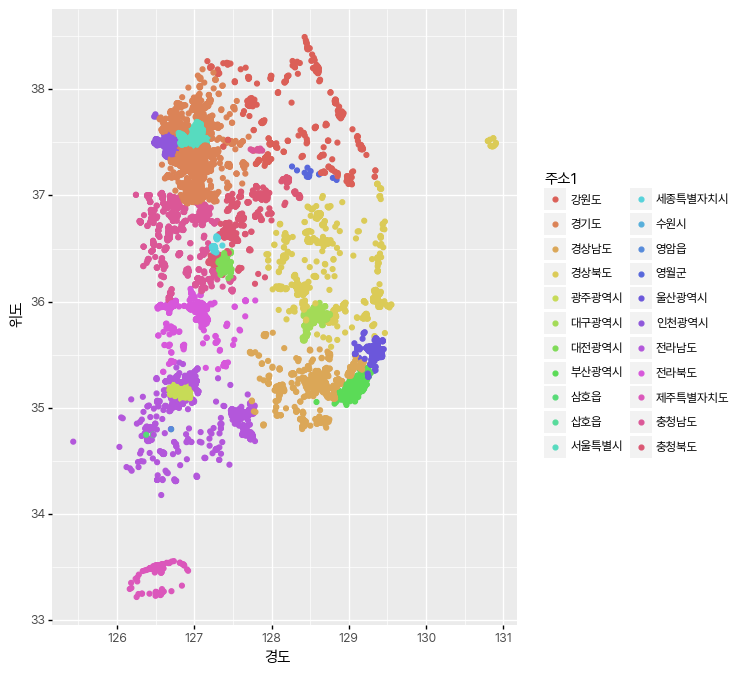

<ggplot: (91139133907)>

In [33]:
(
    ggplot(park_202212_ok, aes(x='경도', y='위도', color="주소1"))
        + geom_point()
        + theme(text=element_text(family='Pretendard'), figure_size=(6, 8))
)

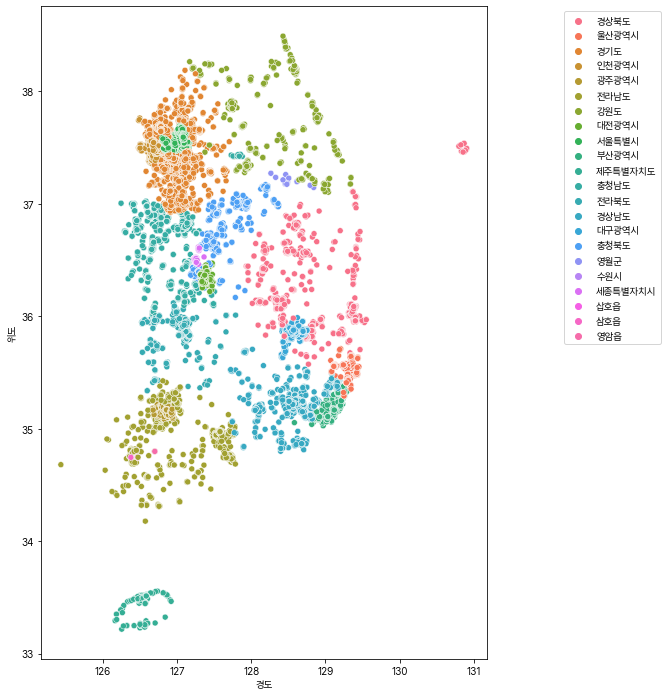

In [36]:
plt.figure(figsize=(8, 12))
sns.scatterplot(data=park_202212_ok, x='경도', y='위도', hue='주소1')
plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
plt.show()

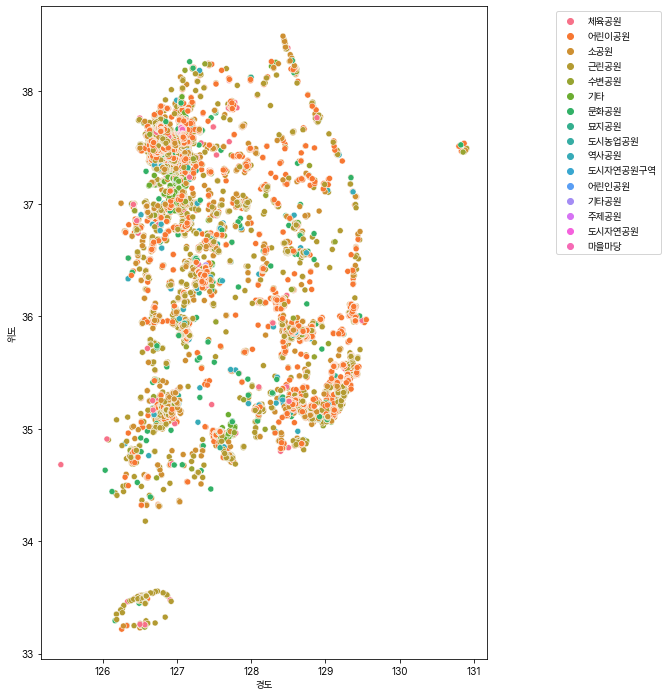

In [37]:
plt.figure(figsize=(8, 12))
sns.scatterplot(data=park_202212_ok, x='경도', y='위도', hue='공원구분')
plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
plt.show()

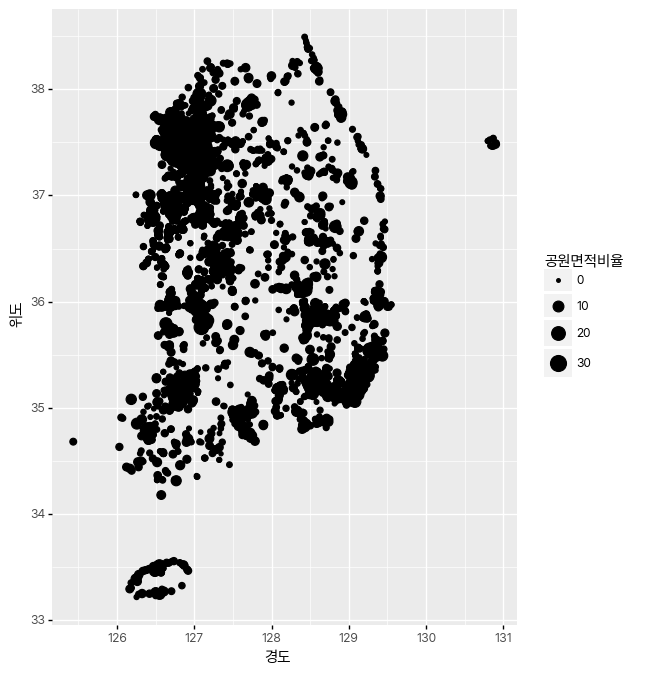

<ggplot: (91141236628)>

In [41]:
(
    ggplot(park_202212_ok, aes(x='경도', y='위도', hue='주소1', size='공원면적비율'))
        + geom_point()
        + theme(text=element_text(family='Pretendard'), figure_size=(6, 8))
)

In [48]:
#어린이 공원을 제외한 공원 분포
park_202212_not_child = park_202212_ok[park_202212_ok['공원구분'] != '어린이공원']

(
    ggplot(park_202212_not_child, aes(x='경도', y='위도', color="주소1"))
        + geom_point()
        + theme(text=element_text(family='Pretendard'), figure_size=(6, 8))
)

In [64]:
# 시도별 공원 비율
# 시도별 합계 데이터를 계산한다.
# value_counts() 함수의 normalize 옵션의 기본값은 False이고 합계를 계산한다.
#   => 옵션을 True로 변경하면 전체 합계에 대한 비율을 계산한다.
# value_counts() 함수의 ascending 옵션의 기본값은 False이고 합계를 내림차순으로 정렬한다.
#   => 옵션을 True로 변경하면 오름차순으로 변경한다.
# value_counts() 함수의 dropna 옵션의 기본값을 False로 변경하면 NaN을 포함시켜 계산한다.
park_do = pd.DataFrame(park_202212_ok['주소1'].value_counts(normalize=False))
park_do

주소1
경기도      4425
충청남도     1762
서울특별시    1759
경상남도     1163
전라남도     1033
경상북도     1019
광주광역시     932
충청북도      789
인천광역시     690
부산광역시     674
전라북도      664
대구광역시     631
강원도       612
울산광역시     467
대전광역시     445
제주특별자치도   245
세종특별자치시    70
영월군        20
삼호읍         3
영암읍         1
삽호읍         1
수원시         1

In [55]:
park_do_normalize = pd.DataFrame(park_202212_ok['주소1'].value_counts(normalize=True, ascending=True, dropna=False))
park_do_normalize.head()

주소1
수원시  0.000057
삽호읍  0.000057
영암읍  0.000057
삼호읍  0.000172
영월군  0.001149

In [67]:
# 시도별 합계 데이터와 비율 데이터를 병합한다.
# 병합하려는 데이터프레임에 병합 기준을 인덱스로 지정하려면 left_index, right_index 옵션을 True로 지정한다. 
park_sido = park_do.merge(park_do_normalize, left_index=True, right_index=True).reset_index()
# 병합된 데이터프레임의 열 이름을 변경한다.
park_sido.columns = ['시도', '합계', '비율']
park_sido.sort_values(by=['합계', '비율'], ascending=True, inplace=True) # 합계에 대한 오름차순 정렬을 실행하고 데이터프레임에 바로 적용한다.
park_sido

시도    합계        비율
19      영암읍     1  0.000057
20      삽호읍     1  0.000057
21      수원시     1  0.000057
18      삼호읍     3  0.000172
17      영월군    20  0.001149
16  세종특별자치시    70  0.004022
15  제주특별자치도   245  0.014076
14    대전광역시   445  0.025566
13    울산광역시   467  0.026830
12      강원도   612  0.035160
11    대구광역시   631  0.036252
10     전라북도   664  0.038148
9     부산광역시   674  0.038722
8     인천광역시   690  0.039642
7      충청북도   789  0.045329
6     광주광역시   932  0.053545
5      경상북도  1019  0.058543
4      전라남도  1033  0.059347
3      경상남도  1163  0.066816
2     서울특별시  1759  0.101057
1      충청남도  1762  0.101229
0       경기도  4425  0.254223

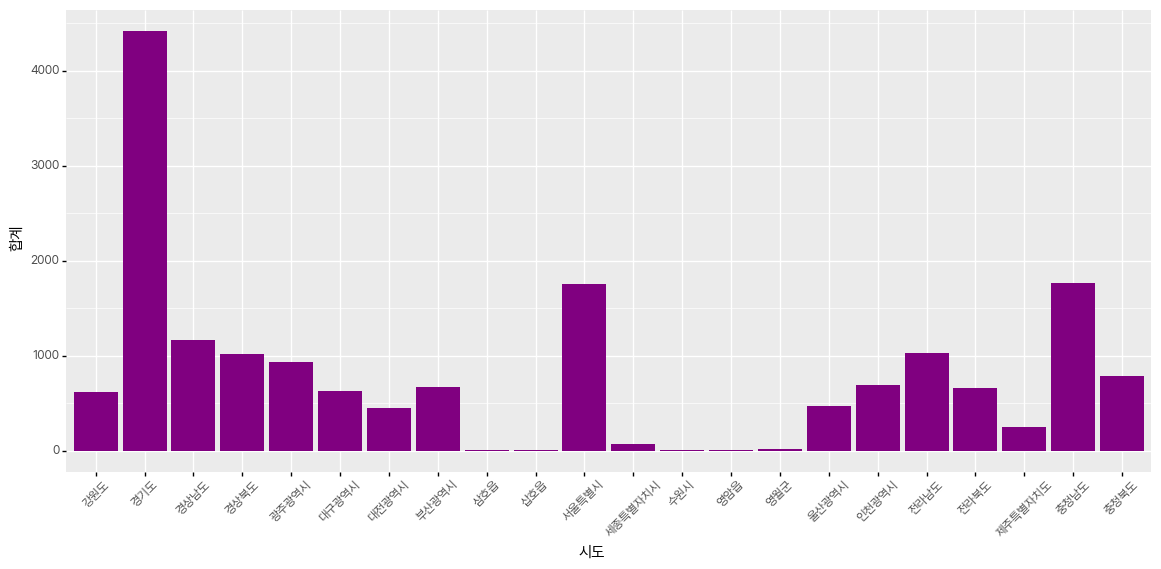

<ggplot: (91141236800)>

In [76]:
(
    ggplot(park_sido, aes(x='시도', y='합계'))
        + geom_bar(stat='identity', position='dodge', fill='purple')
        
        + theme(text=element_text(family='Pretendard'), figure_size=(14, 6), axis_text_x=element_text(rotation=45))
)

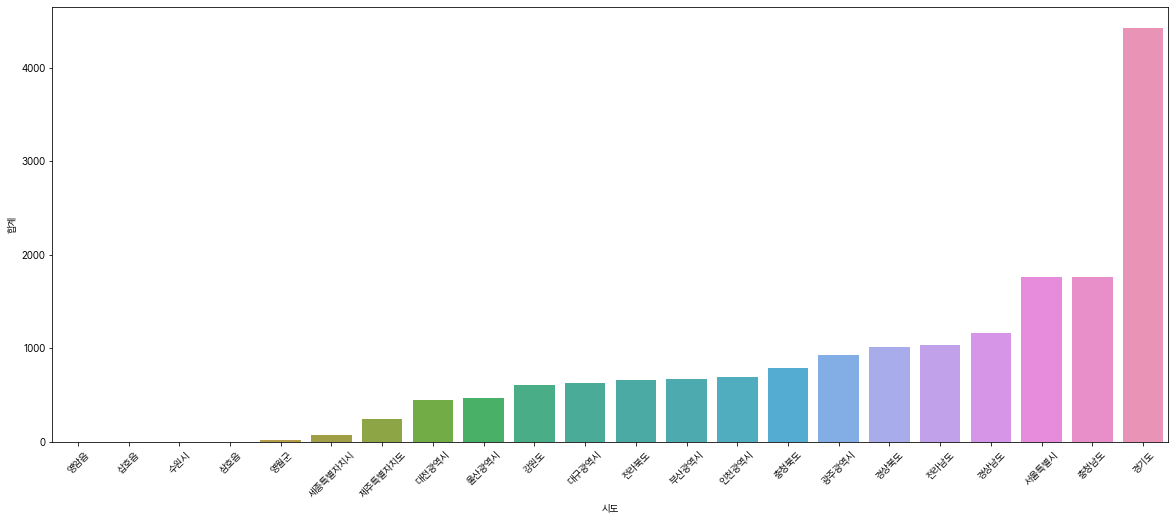

In [83]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=park_sido, x='시도', y='합계')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [88]:
from plotnine import *


In [ ]:
(
    ggplot(mpg)
        + aes(x='manufacturer')
        + geom_bar(size=20)
        + coord_flip() # 차트의 x축, y축을 회전시킨다.
        + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

In [93]:
# 공원 구분별 합계
park_type = pd.DataFrame(park_202212_ok['공원구분'].value_counts()).reset_index()
park_type.columns = ['공원구분', '합계']
park_type

공원구분    합계
0      어린이공원  9072
1       근린공원  3917
2        소공원  2603
3         기타   547
4       문화공원   374
5       수변공원   326
6       체육공원   250
7       역사공원   185
8       마을마당    49
9       묘지공원    38
10      기타공원    30
11    도시농업공원     7
12    도시자연공원     3
13  도시자연공원구역     2
14      주제공원     2
15     어린인공원     1

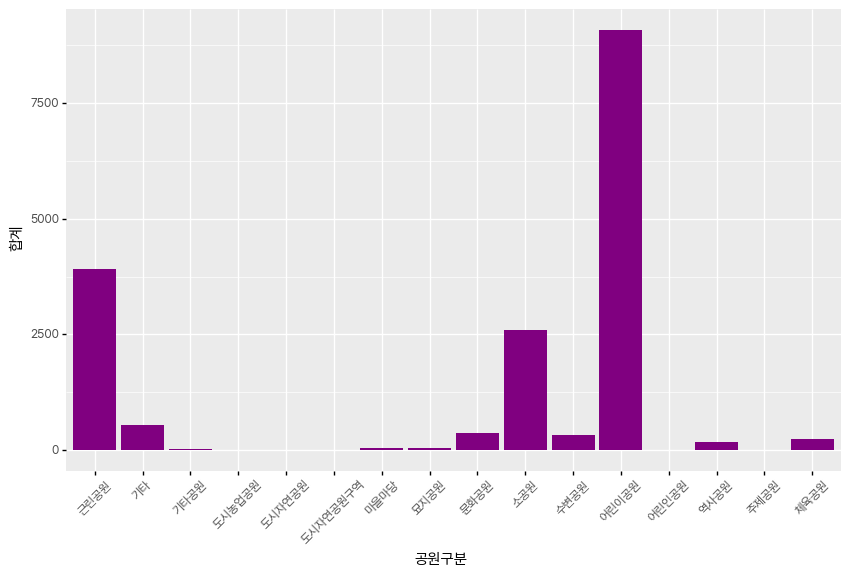

<ggplot: (91138797032)>

In [95]:
(
    ggplot(park_type, aes(x='공원구분', y='합계'))
        + geom_bar(stat='identity', position='dodge', fill='purple')
        + theme(text=element_text(family='Pretendard'), figure_size=(10, 6), axis_text_x=element_text(rotation=45))
)

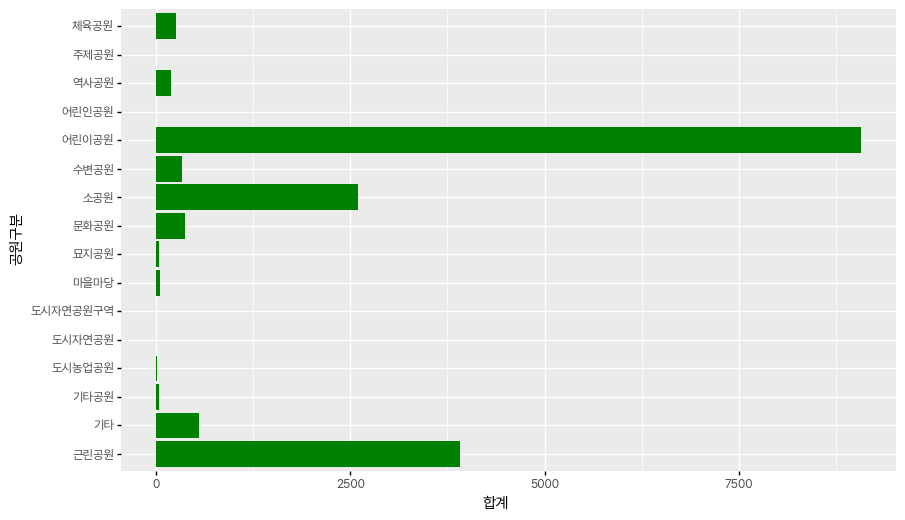

<ggplot: (91140537443)>

In [96]:
(
    ggplot(park_type, aes(x='공원구분', y='합계'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + coord_flip()
        + theme(text=element_text(family='Pretendard'), figure_size=(10, 6))
)

In [99]:
# 경기도 공원 분포
gyeonggi = park_202212_ok[park_202212_ok['주소1'] == '경기도']
gyeonggi

관리번호              공원명   공원구분                 소재지도로명주소  \
36     41590-00510              71호     기타      경기도 화성시 오산동 1030-20   
80     41370-00108     세교2 제5호 수변공원   수변공원          경기도 오산시 금암동 198   
81     41370-00109           원동수변공원   수변공원       경기도 오산시 부원로87번길 51   
82     41370-00110          가장동체육공원   체육공원        경기도 오산시 가장산업동로 49   
107    41430-00111             근린공원   근린공원         경기도 의왕시 초평동 19-1   
...            ...              ...    ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원     경기도 용인시 수지구 풍덕천동 696   

                       소재지지번주소         위도          경도     공원면적           전화번호  \
36         경기도 화성시 오산동 1030-20  37.185729  127.102619   6934.0  031-5189-6961   
80             경기도 오산시 금암동 198  37.169502  127.049281   1258.0  031-8036-6473   
81            경기도 오산시 원동 715-8  37.140907  127.091507  17788.0  031-8036-6473   
82           경기도 오산시 가장동 382-4  37.164782  127.041189  11856.0  031-8036-6473   
107           경기도 의왕시 초평동 19-1  37.318538  126.944477  14234.0   031-345-3083   
...                        ...        ...         ...      ...            ...   
17460    경기도 용인시 처인구 삼가동 288-1  37.238001  127.164249   4878.0            NaN   
17461   경기도 용인시 처인구 삼가동 268-26  37.238235  127.169302  17748.0            NaN   
17462  경기도 용인시 처인구 모현읍 왕산리 949  37.333938  127.253862   5817.0            NaN   
17463   경기도 용인시 처인구 포곡읍 둔전리450  37.272922  127.221799   2558.0            NaN   
17464     경기도 용인시 수지구 풍덕천동 696  37.323979  127.091005  15741.0            NaN   

          데이터기준일자   제공기관코드    제공기관명    공원면적비율  주소1  주소2      주소3      주소4  
36     2022-11-01  5530000  경기도 화성시  0.832706  경기도  화성시      오산동  1030-20  
80     2022-04-30  4000000  경기도 오산시  0.354683  경기도  오산시      금암동      198  
81     2022-04-30  4000000  경기도 오산시  1.333717  경기도  오산시  부원로87번길       51  
82     2022-04-30  4000000  경기도 오산시  1.088853  경기도  오산시   가장산업동로       49  
107    2022-06-13  4030000  경기도 의왕시  1.193063  경기도  의왕시      초평동     19-1  
...           ...      ...      ...       ...  ...  ...      ...      ...  
17460  2022-11-23  4050000  경기도 용인시  0.698427  경기도  용인시      처인구      삼가동  
17461  2022-11-23  4050000  경기도 용인시  1.332216  경기도  용인시      처인구      삼가동  
17462  2022-11-23  4050000  경기도 용인시  0.762693  경기도  용인시      처인구      모현읍  
17463  2022-11-23  4050000  경기도 용인시  0.505767  경기도  용인시      처인구      포곡읍  
17464  2022-11-23  4050000  경기도 용인시  1.254631  경기도  용인시      수지구     풍덕천동  

[4425 rows x 17 columns]

In [101]:
gyeonggi_type = pd.DataFrame(gyeonggi['공원구분'].value_counts()).reset_index()
park_type.columns = ['공원구분', '합계']
park_type

공원구분    합계
0      어린이공원  9072
1       근린공원  3917
2        소공원  2603
3         기타   547
4       문화공원   374
5       수변공원   326
6       체육공원   250
7       역사공원   185
8       마을마당    49
9       묘지공원    38
10      기타공원    30
11    도시농업공원     7
12    도시자연공원     3
13  도시자연공원구역     2
14      주제공원     2
15     어린인공원     1

In [ ]:
gyeonggi_map = folium.Map(location=[gyeonggi['위도'].mean(), gyeonggi['경도'].mean()], zoom_start=10)
for i in gyeonggi.index:
    parkName = folium.Popup('{} - {}'.format(gyeonggi.loc[i, '공원명'], gyeonggi.loc[i, '소재지도로명주소']), max_width=300)
    folium.Marker(location=[gyeonggi.loc[i, '위도'], gyeonggi.loc[i, '경도']], popup=parkName).add_to(gyeonggi_map)

gyeonggi_map

In [111]:
# 수원시 공원 분포
suwon = park_202212_ok[park_202212_ok['주소2'] == '수원시']
suwon

관리번호     공원명  공원구분                   소재지도로명주소  \
529    41113-00121  12호소공원   소공원      경기도 수원시 권선구 평동 13-236   
1061   41111-00059  61호소공원   소공원  경기도 수원시 장안구 정조로 1053번길 36   
1086   41111-00058  60호소공원   소공원      경기도 수원시 장안구 정자동 836-5   
1137   41111-00057  40호소공원   소공원     경기도 수원시 장안구 정자동 569-11   
4668   41111-00055    송원공원   소공원      경기도 수원시 장안구 조원동 912-2   
...            ...     ...   ...                        ...   
6667   41113-00010      솔대  근린공원        경기도 수원시 권선구 고색동 992   
6668   41113-00011   고색중보들  근린공원       경기도 수원시 권선구 고색동 1129   
6669   41113-00012     들바람  근린공원        경기도 수원시 권선구 고색동 931   
6670   41113-00013      고렴  근린공원       경기도 수원시 권선구 곡반정동 546   
15635  41111-00056  39호소공원   소공원        경기도 수원시 장안구 이목동 850   

                      소재지지번주소         위도          경도      공원면적          전화번호  \
529     경기도 수원시 권선구 평동 13-236  37.239795  127.055275    1315.3  031-228-6195   
1061    경기도 수원시 장안구 송죽동 346-6  37.299249  127.003495     971.3  031-228-5995   
1086    경기도 수원시 장안구 정자동 836-5  37.297441  126.998182    3482.0  031-228-5995   
1137   경기도 수원시 장안구 정자동 569-11  37.310750  126.986922    2531.0  031-228-5995   
4668    경기도 수원시 장안구 조원동 912-2  37.307682  127.011315    3071.0  031-228-5995   
...                       ...        ...         ...       ...           ...   
6667      경기도 수원시 권선구 고색동 992  37.236185  126.981703   10354.0  031-228-6195   
6668     경기도 수원시 권선구 고색동 1129  37.248230  126.990030  138326.5  031-228-6195   
6669      경기도 수원시 권선구 고색동 931  37.240728  126.978718    5186.7  031-228-6195   
6670     경기도 수원시 권선구 곡반정동 546  37.240630  127.029210   10571.0  031-228-6195   
15635     경기도 수원시 장안구 이목동 850  37.314276  126.986209    2817.0  031-228-5995   

          데이터기준일자   제공기관코드    제공기관명    공원면적비율  주소1  주소2  주소3   주소4  
529    2022-06-20  3740000  경기도 수원시  0.362671  경기도  수원시  권선구    평동  
1061   2022-06-20  3740000  경기도 수원시  0.311657  경기도  수원시  장안구   정조로  
1086   2022-06-20  3740000  경기도 수원시  0.590085  경기도  수원시  장안구   정자동  
1137   2022-06-20  3740000  경기도 수원시  0.503090  경기도  수원시  장안구   정자동  
4668   2022-06-20  3740000  경기도 수원시  0.554166  경기도  수원시  장안구   조원동  
...           ...      ...      ...       ...  ...  ...  ...   ...  
6667   2022-06-20  3740000  경기도 수원시  1.017546  경기도  수원시  권선구   고색동  
6668   2022-06-20  3740000  경기도 수원시  3.719227  경기도  수원시  권선구   고색동  
6669   2022-06-20  3740000  경기도 수원시  0.720187  경기도  수원시  권선구   고색동  
6670   2022-06-20  3740000  경기도 수원시  1.028154  경기도  수원시  권선구  곡반정동  
15635  2022-06-20  3740000  경기도 수원시  0.530754  경기도  수원시  장안구   이목동  

[334 rows x 17 columns]

In [112]:
suwon_type = pd.DataFrame(suwon['공원구분'].value_counts()).reset_index()
park_type.columns = ['공원구분', '합계']
park_type

공원구분    합계
0      어린이공원  9072
1       근린공원  3917
2        소공원  2603
3         기타   547
4       문화공원   374
5       수변공원   326
6       체육공원   250
7       역사공원   185
8       마을마당    49
9       묘지공원    38
10      기타공원    30
11    도시농업공원     7
12    도시자연공원     3
13  도시자연공원구역     2
14      주제공원     2
15     어린인공원     1

In [120]:
suwon_map = folium.Map(location=[suwon['위도'].mean(), suwon['경도'].mean()], zoom_start=13)
for i in suwon.index:
    parkName = folium.Popup('{} - {}'.format(suwon.loc[i, '공원명'], suwon.loc[i, '소재지도로명주소']), max_width=300)
    folium.CircleMarker(location=[suwon.loc[i, '위도'], suwon.loc[i, '경도']], popup=parkName, radius=suwon.loc[i, '공원면적비율'] * 3, fill_color='white').add_to(suwon_map)

suwon_map

In [121]:
# 경기도 일부 공원만 보기
import re

In [123]:
park_type = r'.*([역사|체육|수변|문화|묘지]공원).*'
gyeonggi_sample =gyeonggi[gyeonggi['공원구분'].str.match(park_type)]
gyeonggi_sample

관리번호       공원명  공원구분                     소재지도로명주소  \
6485  41117-00029      역사공원  역사공원       경기도 수원시 영통구 이의동 산13-88   
6486  41117-00030    신동수변공원  수변공원   경기도 수원시 영통구 덕영대로 1373번길 66   
6535  41113-00030    한림문화공원  문화공원  경기도 수원시 권선구 동수원로 25번길 32-52   
6536  41113-00031   10호문화공원  문화공원         경기도 수원시 권선구 권선동 1253   
6537  41113-00032   11호문화공원  문화공원       경기도 수원시 권선구 권중로 50번길 5   
6538  41113-00033   14호문화공원  문화공원          경기도 수원시 권선구 평동 2-36   
6539  41113-00034   15호문화공원  문화공원          경기도 수원시 권선구 평동 4-11   
6540  41113-00035    세류문화공원  문화공원        경기도 수원시 권선구 세류동 283-1   
6541  41113-00036       달누리  수변공원          경기도 수원시 권선구 입북동 817   
6542  41113-00037    7호수변공원  수변공원           경기도 수원시 권선구 평동 185   
6543  41113-00038      물새공원  수변공원         경기도 수원시 권선구 금곡동 1075   
6544  41113-00039     두레뜰공원  수변공원         경기도 수원시 권선구 금곡동 1092   
6545  41113-00040    두물맞이공원  수변공원         경기도 수원시 권선구 금곡동 1097   
6546  41113-00041     실개울공원  수변공원       경기도 수원시 권선구 금곡동 1095-2   
6547  41113-00042     물빛찬공원  수변공원         경기도 수원시 권선구 금곡동 1120   
6548  41113-00043     어울림공원  수변공원         경기도 수원시 권선구 금곡동 1126   
6549  41113-00044     물향기공원  수변공원        경기도 수원시 권선구 호매실동 1384   
6550  41113-00045     물다미공원  수변공원         경기도 수원시 권선구 호매실동1422   
6551  41113-00046    5호수변공원  수변공원        경기도 수원시 권선구 서둔동 27-23   
6552  41113-00047    6호수변공원  수변공원        경기도 수원시 권선구 서둔동 26-52   
6557  41115-00005      종루공원  역사공원          경기도 수원시 팔달구 정조로 824   
6558  41115-00006    3호역사공원  역사공원           경기도 수원시 팔달구 신풍로 14   
6592  41113-00024    고색체육공원  체육공원    경기도 수원시 권선구 오목천로 152번길 29   
6593  41113-00025   오목천체육공원  체육공원        경기도 수원시 권선구 고색동 904-4   
6594  41113-00026    1호체육공원  체육공원   경기도 수원시 권선구 서수원로 577번길 171   
6595  41113-00027   글모둠문화공원  문화공원          경기도 수원시 권선구 칠보로 169   
6596  41113-00028    누리문화공원  문화공원   경기도 수원시 권선구 서수원로 577번길 225   
6597  41113-00029   권선1문화공원  문화공원         경기도 수원시 권선구 고색동 1187   
6654  41111-00008    정자문화공원  문화공원        경기도 수원시 장안구 이목로 24-25   
6655  41111-00009    새싹문화공원  문화공원          경기도 수원시 장안구 수일로 164   
6656  41111-00010  104호수변공원  수변공원      경기도 수원시 장안구 이목동 519-138   
6657  41111-00011   5호 체육공원  체육공원         경기도 수원시 장안구 덕영대로 623   

                      소재지지번주소         위도          경도      공원면적          전화번호  \
6485   경기도 수원시 영통구 이의동 산13-88  37.297647  127.053096  131972.0  031-228-8331   
6486       경기도 수원시 영통구 신동 942  37.247408  127.040466   24329.0  031-228-8331   
6535   경기도 수원시 권선구 권선동 1355-4  37.237601  127.025025    7154.2  031-228-4861   
6536     경기도 수원시 권선구 권선동 1253  37.253361  127.029668    2231.6  031-228-6195   
6537     경기도 수원시 권선구 권선동 1252  37.252984  127.031226    3301.4  031-228-6195   
6538      경기도 수원시 권선구 평동 2-36  37.258747  126.992399    2678.3  031-228-6195   
6539      경기도 수원시 권선구 평동 4-11  37.258947  126.993164     438.1  031-228-6195   
6540    경기도 수원시 권선구 세류동 283-1  37.258306  127.007166    7102.0  031-228-6195   
6541      경기도 수원시 권선구 입북동 817  37.300490  126.951202    4331.8  031-228-6195   
6542       경기도 수원시 권선구 평동 185  37.259071  126.991451    2991.3  031-228-6195   
6543     경기도 수원시 권선구 금곡동 1075  37.275590  126.944093   32119.5  031-228-6195   
6544     경기도 수원시 권선구 금곡동 1092  37.272523  126.943698   53938.8  031-228-6195   
6545     경기도 수원시 권선구 금곡동 1097  37.270879  126.940797   31022.7  031-228-6195   
6546   경기도 수원시 권선구 금곡동 1095-2  37.271987  126.946799   11291.5  031-228-6195   
6547     경기도 수원시 권선구 금곡동 1120  37.272709  126.951204   20806.3  031-228-6195   
6548     경기도 수원시 권선구 금곡동 1126  37.273288  126.956942   34833.8  031-228-6195   
6549    경기도 수원시 권선구 호매실동 1384  37.263342  126.954391  150447.3  031-228-6195   
6550     경기도 수원시 권선구 호매실동1422  37.259210  126.951423    9038.0  031-228-6195   
6551    경기도 수원시 권선구 서둔동 27-23  37.262175  126.990243    1546.6  031-228-6195   
6552    경기도 수원시 권선구 서둔동 26-52  37.262401  126.991537    3569.2  031-228-6195   
6557    경기도 수원시 팔달구 팔달로1가 6-1  37.281562  127.016952    1013.6  031-228-4473   
6558    경기도 수원시 팔달구 신풍동 221-8  37.282538  127.014973    3536.0  031-228-44

In [125]:
seoul = park_202212_ok[park_202212_ok['주소1'] == '서울특별시']
seoul

관리번호  공원명   공원구분               소재지도로명주소                소재지지번주소  \
310    11590-00045   나비    소공원    서울특별시 동작구 상도동 535-3    서울특별시 동작구 상도동 535-3   
311    11590-00046  꽃담길    소공원     서울특별시 동작구 상도동 25-8     서울특별시 동작구 상도동 25-8   
312    11590-00047   흑석    소공원  서울특별시 동작구 흑석동 186-135  서울특별시 동작구 흑석동 186-135   
313    11590-00048   칸나    소공원      서울특별시 동작구 시흥대로596     서울특별시 동작구 신대방동 698   
314    11590-00049  꿈나래  어린이공원     서울특별시 동작구 상도동 36-1     서울특별시 동작구 상도동 36-1   
...            ...  ...    ...                    ...                    ...   
17404  11500-00001   우장   근린공원      서울특별시 강서구 우장산로 72    서울특별시 강서구 화곡동 산60-1   
17405  11500-00002   궁산   근린공원     서울특별시 강서구 가양동 산4-7     서울특별시 강서구 가양동 산4-7   
17406  11500-00003   염창   근린공원    서울특별시 강서구 양천로67길 43    서울특별시 강서구 염창동 산24-1   
17407  11500-00004  꿩고개   근린공원    서울특별시 강서구 방화동 산97-1    서울특별시 강서구 방화동 산97-1   
17408  11500-00005  봉제산   근린공원       서울특별시 강서구 화곡동 산1       서울특별시 강서구 화곡동 산1   

              위도          경도      공원면적          전화번호     데이터기준일자   제공기관코드  \
310    37.503346  126.943593     564.1           NaN  2022-04-25  3190000   
311    37.505644  126.942102     206.0           NaN  2022-04-25  3190000   
312    37.509161  126.957863     442.0           NaN  2022-04-25  3190000   
313    37.485627  126.904308     241.0           NaN  2022-04-25  3190000   
314    37.505268  126.948180    1720.2           NaN  2022-04-25  3190000   
...          ...         ...       ...           ...         ...      ...   
17404  37.552820  126.843808  359435.2  02-2600-4185  2022-03-16  3150000   
17405  37.574254  126.841332  135002.7  02-2600-4185  2022-03-16  3150000   
17406  37.557007  126.869821  112070.0  02-2600-4186  2022-03-16  3150000   
17407  37.577983  126.808105  180000.0  02-2600-4186  2022-03-16  3150000   
17408  37.539906  126.849751  917190.0  02-2600-4184  2022-03-16  3150000   

           제공기관명    공원면적비율    주소1  주소2      주소3      주소4  
310    서울특별시 동작구  0.237508  서울특별시  동작구      상도동    535-3  
311    서울특별시 동작구  0.143527  서울특별시  동작구      상도동     25-8  
312    서울특별시 동작구  0.210238  서울특별시  동작구      흑석동  186-135  
313    서울특별시 동작구  0.155242  서울특별시  동작구  시흥대로596     None  
314    서울특별시 동작구  0.414753  서울특별시  동작구      상도동     36-1  
...          ...       ...    ...  ...      ...      ...  
17404  서울특별시 강서구  5.995291  서울특별시  강서구     우장산로       72  
17405  서울특별시 강서구  3.674271  서울특별시  강서구      가양동     산4-7  
17406  서울특별시 강서구  3.347686  서울특별시  강서구   양천로67길       43  
17407  서울특별시 강서구  4.242641  서울특별시  강서구      방화동    산97-1  
17408  서울특별시 강서구  9.577004  서울특별시  강서구      화곡동       산1  

[1759 rows x 17 columns]

In [127]:
set(seoul['주소1'])

{'서울특별시'}